In [1]:
import torch
from easy_transformer import EasyTransformer

#device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
print(f"Using {device} device")
torch.set_grad_enabled(False)

model = EasyTransformer.from_pretrained('gpt2').to(device)

# Convenience function for decoding token
decode = model.tokenizer.decode

# Convenience function for encoding token
def encode(t):
    global model
    result = model.tokenizer.encode(t)
    if len(result) != 1:
        raise Exception(f"Not a single token: {t}")
    return result[0]

unembed = model.unembed.W_U.data
embed = model.embed.W_E.data
d_M = model.cfg.d_model
d_V = model.cfg.d_vocab

unembed_norm = torch.nn.functional.normalize(unembed, dim=0)

Using cpu device
Loading model: gpt2


/home/giles/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
Using pad_token, but it is not set yet.


Moving model to device:  cpu
Finished loading pretrained model gpt2 into EasyTransformer!
Moving model to device:  cpu


55.4127 % are negative


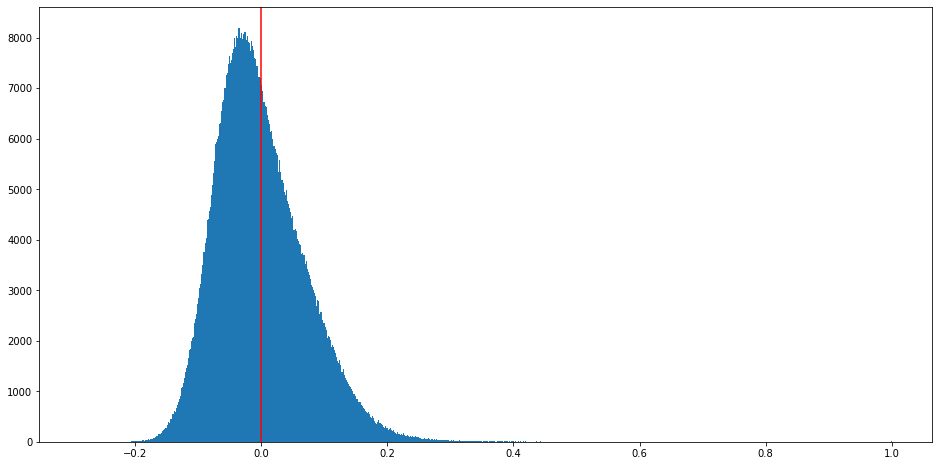

In [57]:
import matplotlib.pyplot as plt

n = 1000000
n_bins = 1000
generator = torch.Generator()
generator.manual_seed(12345)
ts0 = torch.randint(0, d_V, (n,), generator=generator)
ts1 = torch.randint(0, d_V, (n,), generator=generator)
fs0 = unembed_norm[:,ts0]
fs1 = unembed_norm[:,ts1]
#ds = torch.linalg.vector_norm(fs0 - fs1, dim=0)
ds = (fs0 * fs1).sum(dim=0)
hist, bin_edges = torch.histogram(ds, n_bins)
cumsum = torch.cumsum(hist,dim=0)

plt.rcParams['figure.figsize'] = [16, 8]
plt.bar(bin_edges[:-1], hist, bin_edges[1:] - bin_edges[:-1])
plt.axvline(0, color='r')

print((ds < 0).sum().item() / n * 100, '% are negative')

In [68]:

indices = torch.nonzero(ds < -0.2)
print(indices.shape)
for index in indices:
    print(f'{decode(ts0[index]):20}', f'{decode(ts1[index]):20}')

torch.Size([73, 1])
 scalp               YING                
Europe                attendant          
 declining           Texture             
 Optical              partying           
                     14                 
 push                Property            
 Nolan                capac              
Tour                  masked             
 ecological          027                 
 Sw                   carbohyd           
 subconscious        Update              
DCS                   hunter             
 monument            �                   
 encrypt             Sports              
270                   phony              
Sol                   obst               
54                   �                   
Alternatively         honors             
Lake                  revers             
 behavi               February           
endants               Week               
 is                                     
Increase              clandestine        
 cataly       

50.0235 % are negative


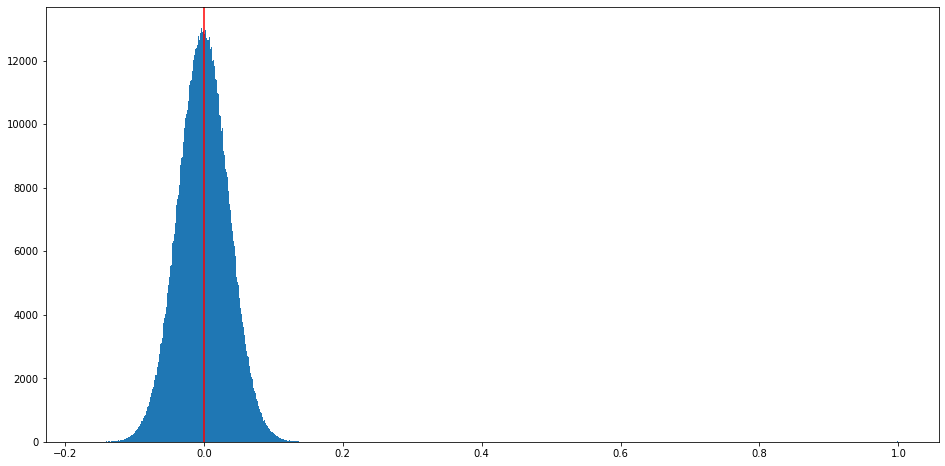

In [56]:
generator = torch.Generator()
generator.manual_seed(12344)

random = torch.normal(0, 1, unembed.shape)
random_norm = torch.nn.functional.normalize(random, dim=0)

n = 1000000
n_bins = 1000
generator = torch.Generator()
generator.manual_seed(12345)
ts0 = torch.randint(0, d_V, (n,), generator=generator)
ts1 = torch.randint(0, d_V, (n,), generator=generator)
fs0 = random_norm[:,ts0]
fs1 = random_norm[:,ts1]
#ds = torch.linalg.vector_norm(fs0 - fs1, dim=0)
ds = (fs0 * fs1).sum(dim=0)
hist, bin_edges = torch.histogram(ds, n_bins)
cumsum = torch.cumsum(hist,dim=0)

plt.rcParams['figure.figsize'] = [16, 8]
plt.bar(bin_edges[:-1], hist, bin_edges[1:] - bin_edges[:-1])
plt.axvline(0, color='r')

print((ds < 0).sum().item() / n * 100, '% are negative')